# Basic idea (no additional files needed)

In [11]:
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixEntry, MultiEntry, IonEntry, PourbaixPlotter
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.core.ion import Ion

In [2]:
entries = []

In [3]:
# example solid, inputs: [name of the solid, its formation energy per formula unit in eV]
entries.append(PourbaixEntry(ComputedEntry("Cr2O3", -9.72, correction = 0.0)))

In [6]:
# example ions, inputs: [name of ion without the charge, 
#                        charge of ion, 
#                        formation energy per f.u. in eV, 
#                        concentration of the ion (eta)]

# 'Cr(OH)[2+]'
entries.append(PourbaixEntry(IonEntry(Ion("Cr(OH)", charge = 2), -4.40), concentration = 1e-6))

# 'CrO4[2-]'
entries.append(PourbaixEntry(IonEntry(Ion("CrO4", charge = -2), -7.55), concentration = 1e-6))

In [7]:
# creating the diagram
pbx = PourbaixDiagram(entries, conc_dict={"Cr": 1e-6}, filter_solids=False)

# Sanity checks

In [ ]:
# they use an RT that multiplies to: 0.0591 / np.log(10) 

In [10]:
# the energies below are: formation energy + concentration term (if ion) - (# of H2O * formation energy of H2O)
# for example, for Cr(OH)[2+], this is -4.40 + RT*ln(1e-6) - 1*-2.4583
pbx.all_entries

[Pourbaix Entry : Cr2 O3 with energy = -2.3451, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Cr1 O1 H1 with energy = -2.2963, npH = -1.0, nPhi = -3.0, nH2O = 1.0, entry_id = None ,
 Pourbaix Entry : Cr1 O4 with energy = 1.9286, npH = -8.0, nPhi = -6.0, nH2O = 4.0, entry_id = None ]

In [22]:
import numpy as np # np.log is natural log
-4.40 + (0.0591 / np.log(10))*np.log(1e-6) - 1*-2.4583

-2.2963

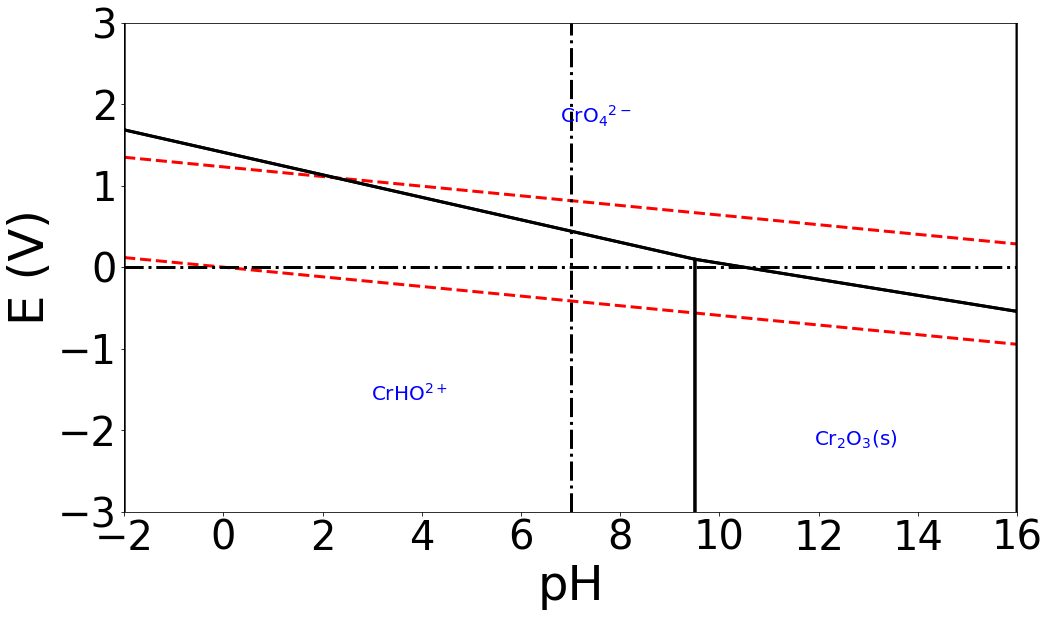

In [12]:
plotter = PourbaixPlotter(pbx)
plotter.get_pourbaix_plot().show()

# How I use it

In [15]:
import pickle
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.core.ion import Ion
from pymatgen.core.composition import Composition

# this is all from a older version of pymatgen.analysis.pourbaix_diagram, v2022-0-11
from Lauren.pourbaix_final import PourbaixDiagram, PourbaixEntry, PourbaixPlotter, MultiEntry, IonEntry, PREFAC

In [2]:
# you can use any dictionaries with similar formatting
 
all_oxides = pickle.load(open("Lauren/Cr-Mo-W/dft_all_oxides", "rb")) 
all_ions_v2 = pickle.load(open("Lauren/Cr-Mo-W/all_ions_v2", "rb"))

In [3]:
all_oxides

{'Cr2(MoW)9': {'formation_energy_per_fu': 0.6068504999999789},
 'Cr3(MoW)11': {'formation_energy_per_fu': 0.9118469999999945},
 'Cr(MoW)3': {'formation_energy_per_fu': 0.32636666666665803},
 'Cr3(MoW)8': {'formation_energy_per_fu': 0.944666500000011},
 'Cr4(MoW)9': {'formation_energy_per_fu': 1.1788894999999968},
 'Cr(MoW)2': {'formation_energy_per_fu': 0.2944840000000042},
 'Cr2HO4': {'formation_energy_per_fu': -12.506128780000008},
 'Cr2O3': {'formation_energy_per_fu': -9.72186962666667},
 'Cr3HO8': {'formation_energy_per_fu': -18.613416559999997},
 'Cr3O': {'formation_energy_per_fu': 1.4270866799999995},
 'Cr(MoW)12': {'formation_energy_per_fu': 0.25546149999996715},
 'Cr5O12': {'formation_energy_per_fu': -29.596432840000006},
 'Cr(MoW)8': {'formation_energy_per_fu': 0.27526750000001243},
 'Cr2(MoW)11': {'formation_energy_per_fu': 0.6079875000000072},
 'CrHO2': {'formation_energy_per_fu': -6.670364973333333},
 'CrO2': {'formation_energy_per_fu': -5.834853139999998},
 'CrO3': {'forma

In [4]:
all_ions_v2

{'Cr': {'Cr(OH)[2+]': {'energy': -4.4027615,
   'charge': 2,
   'n_major': 1,
   'major': 'Cr',
   'without_charge': 'Cr(OH)',
   'in_consideration': True},
  'Cr(OH)2[+]': {'energy': -6.51268498,
   'charge': 1,
   'n_major': 1,
   'major': 'Cr',
   'without_charge': 'Cr(OH)2',
   'in_consideration': True},
  'Cr(OH)4[-]': {'energy': -10.7968175,
   'charge': -1,
   'n_major': 1,
   'major': 'Cr',
   'without_charge': 'Cr(OH)4',
   'in_consideration': True},
  'Cr[2+]': {'energy': -1.742134833,
   'charge': 2,
   'n_major': 1,
   'major': 'Cr',
   'without_charge': 'Cr',
   'in_consideration': True},
  'Cr[3+]': {'energy': -2.1662125,
   'charge': 3,
   'n_major': 1,
   'major': 'Cr',
   'without_charge': 'Cr',
   'in_consideration': True},
  'Cr2O7[2-]': {'energy': -13.49170336,
   'charge': -2,
   'n_major': 2,
   'major': 'Cr',
   'without_charge': 'Cr2O7',
   'in_consideration': True},
  'CrO2[-]': {'energy': -5.56875475,
   'charge': -1,
   'n_major': 1,
   'major': 'Cr',
   'wit

In [5]:
def get_solids_in_sys(metals):
    solids = {}
    for ox in all_oxides.keys():
        for met in metals:
            if met in Composition(ox).as_dict().keys():
                solids[ox] = all_oxides[ox]
                break
    return solids

def get_ions_in_sys(metals):
    end_dict = {}
    for i in metals:
        if all_ions_v2.get(i) is None:
            print("No ions found for:", i)
            return None
        end_dict.update(all_ions_v2[i])
    return end_dict

In [10]:
def gen_entries(metals, concentrations):
    if metals.sort() != list(concentrations.keys()).sort():
        print("Metals and concentrations do not match.")
        return
    entries = []
    solids = get_solids_in_sys(metals)
    ions = get_ions_in_sys(metals)
    for so in solids.keys():
        # could end up adding custom correction
        entries.append(PourbaixEntry(ComputedEntry(so, solids[so]["formation_energy_per_fu"], correction = 0.0)))
    for io in ions.keys():
        if ions[io]["in_consideration"]:
            entries.append(PourbaixEntry(IonEntry(Ion(ions[io]["without_charge"], charge = ions[io]["charge"]), ions[io]["energy"]), concentration = concentrations[ions[io]["major"]]))
    for m in metals:
        entries.append(PourbaixEntry(ComputedEntry(m, 0, correction = 0.0)))
    return entries

In [11]:
METALS = ["Cr", "Mo", "W"]
if len(METALS) > 1:
    sin = False
else:
    sin = True
CONCEN = 1e-6
ADJUSTED_RATIO = [0.33, 0.33, 0.34]
if len(ADJUSTED_RATIO) != len(METALS):
    print("Ratios entered incorrectly")
else:
    METAL_RATIOS = {i: j for i, j in zip(METALS, ADJUSTED_RATIO)}
    CONCENTRATIONS = {i: CONCEN for i in METALS}
    ents = gen_entries(METALS, CONCENTRATIONS)
    pbx = PourbaixDiagram(ents, comp_dict=METAL_RATIOS,
                          conc_dict=CONCENTRATIONS, filter_solids=False)

  0%|          | 0/1170 [00:00<?, ?it/s]

In [14]:
pbx.all_entries

[Multiple Pourbaix Entry: energy = -0.5539, npH = -5.450000000000006, nPhi = -5.450000000000006, nH2O = 3.1200000000000037, entry_id = [None, None, None], species: Mo3O8(s) + Cr3HO8(s) + H2WO4(s),
 Multiple Pourbaix Entry: energy = 0.5103, npH = -7.34000000000001, nPhi = -6.680000000000008, nH2O = 4.670000000000005, entry_id = [None, None, None], species: MoH4O5(s) + H2WO5(s) + CrO4[2-],
 Multiple Pourbaix Entry: energy = -1.1013, npH = -3.049999999999998, nPhi = -4.02, nH2O = 1.689999999999999, entry_id = [None, None, None], species: WO4[2-] + CrHO[2+] + Mo[3+],
 Multiple Pourbaix Entry: energy = 0.5061, npH = -4.619999999999996, nPhi = -2.969999999999998, nH2O = 2.309999999999998, entry_id = [None, None, None], species: W(s) + CrO3[3-] + MoO4[2-],
 Multiple Pourbaix Entry: energy = -0.8901, npH = -2.679999999999998, nPhi = -5.01, nH2O = 3.320000000000003, entry_id = [None, None, None], species: WO2[2+] + Cr(H2O)6[3+] + MoO2[2+],
 Multiple Pourbaix Entry: energy = -1.5357, npH = -4.35

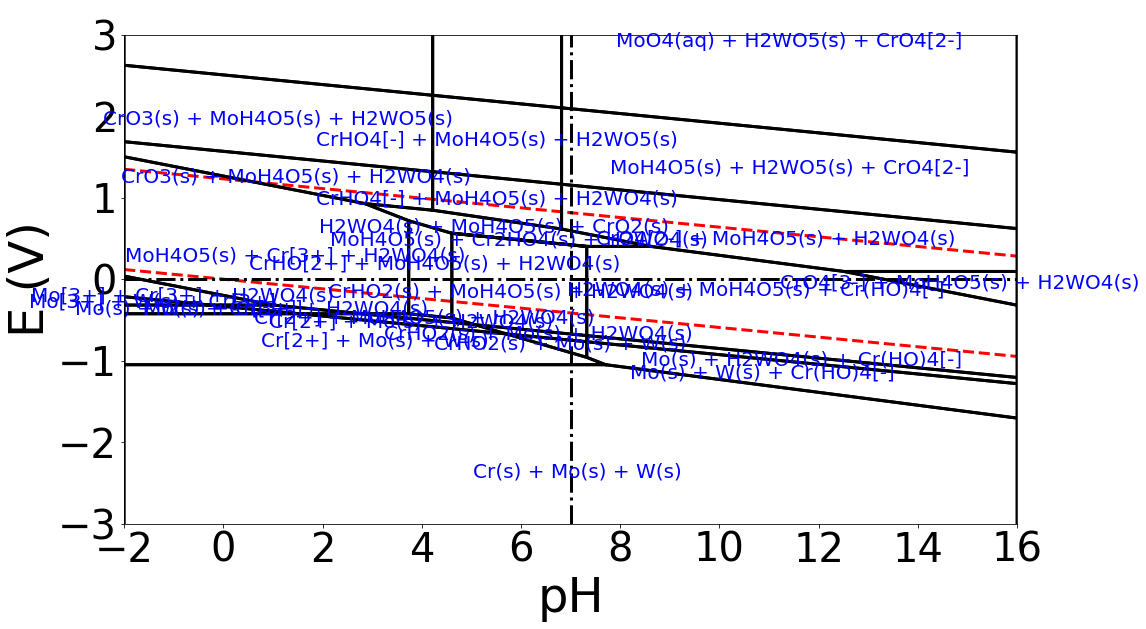

In [16]:
plotter = PourbaixPlotter(pbx)
plotter.get_pourbaix_plot().show()